# Module 1 Movie Project 

## Proposal to Microsoft 

## Goals:

* What determines successful movies?  
  * Genres? 
  * Seasonalities? 
  * Actors/Actresses?
  * Movie Duration? 
  
* Learning from past samples:
  * Movies released in 2009-2018
  * Movies in English only 
  * Worldwide gross sales/budget
    * From The Numbers
    * Box Office
  * Popularity Index
    * TheMovieDB.org
  * Genre, actors/actresses, length
    * IMDB

## Use Popularity index as gross revenue proxy
  * Popularity index: 
    * It's based on user interactions on the themoviedb.org website. Things like page views, users adding it to a list, users rating it, and other factors. Release date also plays a part with recently released shows weighted higher in popularity.

### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helperfunction as hf
%matplotlib inline
pd.set_option('display.precision', 3)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


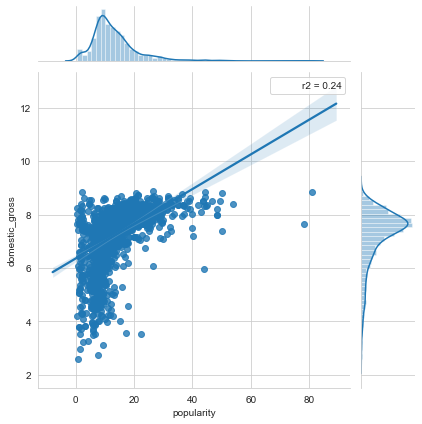

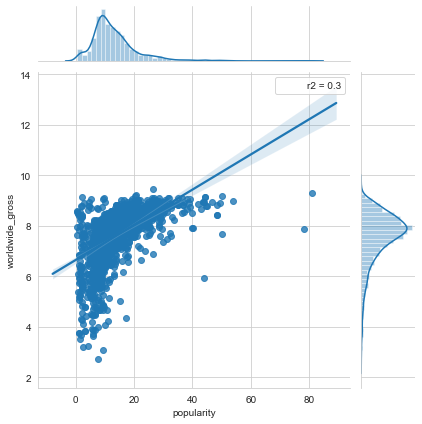

In [9]:
# popuarlity index have the highest R2 as compared to other vote features from both imdb and tmdb
budget_popularity = pd.read_pickle('budget_popularit.pkl')
sns.set_style('whitegrid')
sns.jointplot(budget_popularity['popularity'], np.log10(
    budget_popularity['domestic_gross']), kind="reg", stat_func=hf.r2)
sns.jointplot(budget_popularity['popularity'], np.log10(
    budget_popularity['worldwide_gross']), kind="reg", stat_func=hf.r2)
plt.show()

## Genre and seasonalities:
  * chosen the top 6 most frequent genres: Drama, comedy, action, horror, documentary, thriller 
  * box plot for all 6 genres by month 

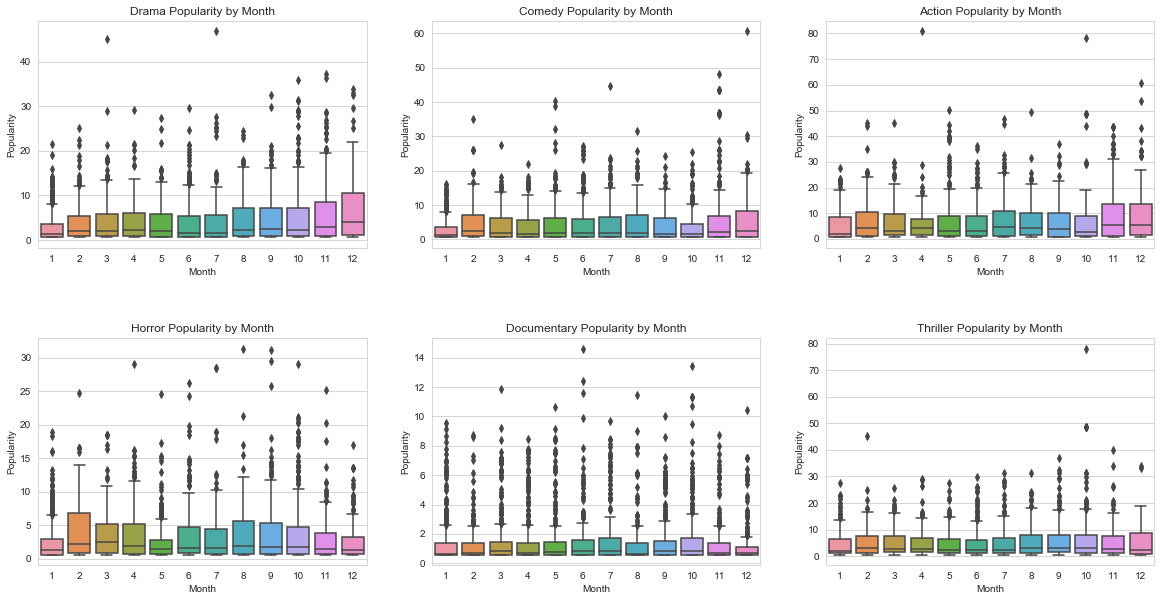

In [46]:
# load genres
genre_popularity = pd.read_pickle('genre_popularity.pkl')
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
# plot drama
drama = genre_popularity[genre_popularity.genres == 'Drama']
ax1 = plt.subplot(231)
ax1 = sns.boxplot(x="month", y="popularity", data=drama, ax=ax1)
ax1.set_xlabel('Month')
ax1.set_ylabel('Popularity')
ax1.set_title('Drama Popularity by Month')
# plot comdedy
comedy = genre_popularity[genre_popularity.genres == 'Comedy']
ax2 = plt.subplot(232)
ax2 = sns.boxplot(x="month", y="popularity", data=comedy, ax=ax2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Popularity')
ax2.set_title('Comedy Popularity by Month')
# plot action
action = genre_popularity[genre_popularity.genres == 'Action']
ax3 = plt.subplot(233)
ax3 = sns.boxplot(x="month", y="popularity", data=action, ax=ax3)
ax3.set_xlabel('Month')
ax3.set_ylabel('Popularity')
ax3.set_title('Action Popularity by Month')
# plot horror
horror = genre_popularity[genre_popularity.genres == 'Horror']
ax4 = plt.subplot(234)
ax4 = sns.boxplot(x="month", y="popularity", data=horror, ax=ax4)
ax4.set_xlabel('Month')
ax4.set_ylabel('Popularity')
ax4.set_title('Horror Popularity by Month')
# plot documentary
documentary = genre_popularity[genre_popularity.genres == 'Documentary']
ax5 = plt.subplot(235)
ax5 = sns.boxplot(x="month", y="popularity", data=documentary, ax=ax5)
ax5.set_xlabel('Month')
ax5.set_ylabel('Popularity')
ax5.set_title('Documentary Popularity by Month')
# plot thriller
thriller = genre_popularity[genre_popularity.genres == 'Thriller']
ax6 = plt.subplot(236)
ax6 = sns.boxplot(x="month", y="popularity", data=thriller, ax=ax6)
ax6.set_xlabel('Month')
ax6.set_ylabel('Popularity')
ax6.set_title('Thriller Popularity by Month')
plt.subplots_adjust(hspace=0.4)
plt.show()

## The graph suggests minimal seasonal and genre influence for movie popularity 

## Hiring known actors and actress:
  * is more the better? 

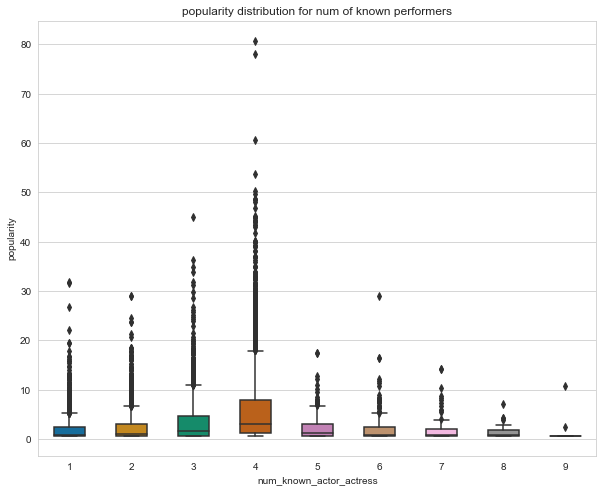

In [47]:
# load the dataset
performer_popularity = pd.read_pickle('performer_popularity.pkl')
# plot group by num_known_actor_actress
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
bplot = sns.boxplot(y='popularity', x='num_known_actor_actress',
                    data=performer_popularity,
                    width=0.5,
                    palette="colorblind")
plt.title('popularity distribution for num of known performers')
plt.show()

## hiring 4 known actor_actress may be better than hiring too many or too few 

## Movie Length: 
  * divide the length into 4 bins:
    * 0 to 50 min
    * 50 min to 100 min
    * 100 min to 150 min
    * 150 min to 200 min

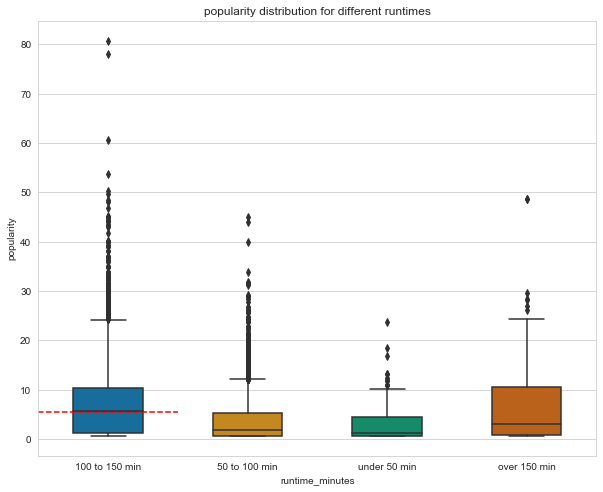

In [70]:
# use binning helper function from hf to bin the run time into 4 categories
performer_popularity.runtime_minutes = performer_popularity.runtime_minutes.apply(
    hf.binning)
# plot group by runtime_minutes
sns.set_style('whitegrid')
plt.figure(figsize=(10, 8))
bplot = sns.boxplot(y='popularity', x='runtime_minutes',
                    data=performer_popularity,
                    width=0.5,
                    palette="colorblind")
plt.title('popularity distribution for different runtimes')
plt.hlines(y=5.5, xmin=-0.5, xmax=0.5, linestyle='--', color='red')
plt.show()

## 100 to 150 min seems to be the best runtime length 

## Conclusions:
  1. No significant difference among different genres 
  2. No significant differences among months of release
  3. hiring around 4 known actor or actress can help improve popularity 
  4. movie length should be around 100 to 150 min